<a href="https://colab.research.google.com/github/tr3nt-tayl0r/CIMIS/blob/main/delta_ETo_ECDF_by_station.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tr3nt-tayl0r/CIMIS.git

Cloning into 'CIMIS'...
remote: Enumerating objects: 10848, done.
remote: Counting objects: 100% (387/387), done.
remote: Compressing objects: 100% (355/355), done.
remote: Total 10848 (delta 32), reused 387 (delta 32), pack-reused 10461 (from 1)
Receiving objects: 100% (10848/10848), 654.69 MiB | 10.00 MiB/s, done.
Resolving deltas: 100% (2211/2211), done.
Updating files: 100% (4027/4027), done.


In [2]:
import glob
import os
import sys
import datetime
import numpy as np
import pandas as pd
import json
import requests
import datetime
import matplotlib.pyplot as plt
from google.colab import userdata
!pip install cartopy
import cartopy
import geopandas as gpd
!pip install refet
import math
import refet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 64.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for refet: filename=refet-0.4.2-py3-none-any.whl size=19274 sha256=efb03dc51f4a3d61cd1fb85c6926bcca3caa84c3efc2bd8efa635972944cd7e8
  Stored in directory: /root/.cache/pip/wheels/ab/55/da/7ed6e47f6fa1135fcdef373db6f974fd7515ee8e86c9662e88
Successfully built refet


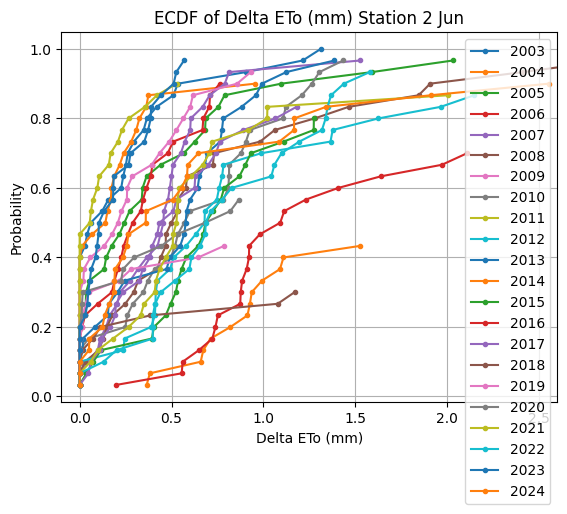

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

station_ids = [2]

for id in station_ids:
  dir = "/content/CIMIS/CIMIS_Project_Data/CIMIS_daily_corr_data/"
  file = f'station_id{id}_cimis_daily_corr.csv'
  df = pd.read_csv(f'{dir}{file}')
  df['Date'] = pd.to_datetime(df.Date)
  df.set_index(pd.to_datetime(df.Date),inplace=True)
  df = df[(df['Date'].dt.month == 6)]

  years = list(range(2003,2025))
  for year in years:
    df_yr = df[(df['Date'].dt.year == year)]
    ecdf = ECDF(df_yr['d_ETo'])
    plt.xlim(-0.1, 2.6)
    plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5])

    plt.plot(ecdf.x, ecdf.y, marker='.', linestyle='-')
    plt.xlabel('Delta ETo (mm)')
    plt.ylabel('Probability')
    plt.title(f'ECDF of Delta ETo (mm) Station {id} Jun')
    plt.grid(True)
    plt.legend(years)
